In [2]:
%pip install  openpyxl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [3]:
final_data = pd.read_csv('../data/final_data.csv')

In [95]:
final_data

,Unnamed: 0,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT,State_CTY,Population,Crime_Rates,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,0,Alabama,3,490,7,35,130,318,Alabama3,208563,234.941001,2.9,7.1,28.5,21.2,10.6,17.4,12.3,89.9,29.6
1,1,Alabama,15,303,8,17,65,213,Alabama15,114611,264.372530,6.5,11.3,31.7,27.1,7.0,9.3,7.2,82.2,16.5
2,2,Alabama,43,28,1,4,3,20,Alabama43,82471,33.951328,8.0,14.6,32.2,18.3,10.0,11.4,5.5,77.4,16.9
3,3,Alabama,49,39,2,1,1,35,Alabama49,70900,55.007052,10.3,15.3,31.8,22.1,9.7,6.8,4.1,74.4,10.9
4,4,Alabama,55,185,7,4,35,139,Alabama55,102564,180.375180,6.3,12.2,34.8,23.5,7.7,9.7,5.9,81.5,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,767,Wisconsin,133,225,24,27,51,123,Wisconsin133,134296,167.540359,1.1,2.8,23.7,19.8,9.7,27.8,15.1,96.1,42.9
768,768,Wisconsin,139,200,1,5,38,156,Wisconsin139,398424,50.197779,2.1,5.7,34.0,19.7,10.1,20.3,8.1,92.2,28.4
769,769,Wisconsin,141,15,1,5,2,7,Wisconsin141,169886,8.829450,2.6,5.6,37.2,20.2,13.1,12.6,8.7,91.8,21.3
770,770,Wyoming,21,99,1,6,9,83,Wyoming21,73107,135.417949,1.7,4.3,25.3,26.5,14.9,17.4,9.9,94.0,27.3


In [79]:
%pip install -U scikit-learn
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


In [144]:

model1 = LinearRegression().fit(final_data["Population 25 years and over!!Graduate or professional degree"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index][:200].astype(int).values.reshape(-1,1),final_data['Crime_Rates'][final_data['Crime_Rates']<1000][:200].astype(int).values)



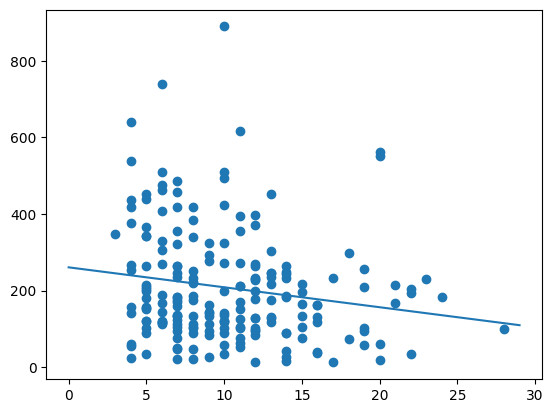

In [147]:
plt.scatter(final_data["Population 25 years and over!!Graduate or professional degree"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index][:200].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000][:200].astype(int))
plt.plot(range(0,30), model1.predict(np.array(range(0,30)).reshape(-1,1)))


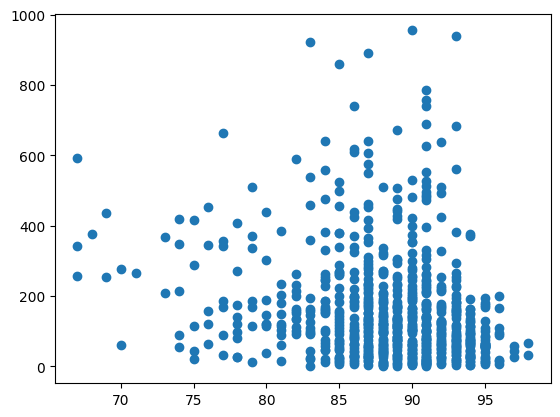

In [6]:
#more crime with higher education... lack of data points with low education maybe?
plt.scatter(final_data["Percent high school graduate or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int))

In [7]:
model = np.poly1d(np.polyfit(final_data["Percent bachelor's degree or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int),1))

In [45]:
reg = LinearRegression().fit(final_data["Percent bachelor's degree or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int).values.reshape(-1, 1), final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int).values)

In [71]:
reg.predict(np.array(20).reshape(-1,1))

array([162.18584534])

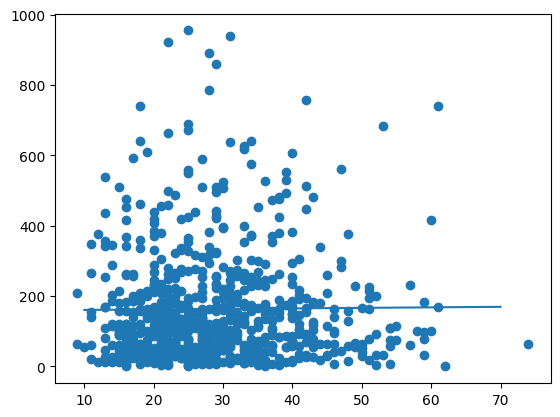

In [74]:
#plotting all crime data points less than 1000 against bachelors degree or higher
plt.scatter(final_data["Percent bachelor's degree or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int))
plt.plot(range(10,71), reg.predict(np.array(range(10,71)).reshape(-1,1)))